All data are pulled from the following sources at 3:20 pm EDT, April 8th, 2020. 

Data Sources:
- The COVID tracking project https://covidtracking.com/data; Data can be accessed directly here: https://github.com/COVID19Tracking/covid-tracking-
    - `total_test_by_state.csv`
    - `us_census_2018_population_estimates_states.csv`
- Johns Hopkins CSSE: https://github.com/CSSEGISandData/COVID-19
    - `time_series_covid19_deaths_US.csv`
    - `time_series_covid19_confirmed_US.csv`

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Current(as of 04/08/2020) overview for the U.S. 

In [76]:
pd.read_csv('total_test_by_state.csv').columns

Index(['state', 'positive', 'positiveScore', 'negativeScore',
       'negativeRegularScore', 'commercialScore', 'grade', 'score', 'negative',
       'pending', 'hospitalizedCurrently', 'hospitalizedCumulative',
       'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently',
       'onVentilatorCumulative', 'recovered', 'lastUpdateEt', 'checkTimeEt',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'dateModified', 'dateChecked', 'notes', 'hash'],
      dtype='object')

In [2]:
states_current = pd.read_csv('total_test_by_state.csv')
# For the sake of this part, we'll only look at the following columns 
states_current = states_current[['state', 'positive', 'total']]
states_current.head()

,state,positive,total
0,AK,213,6913
1,AL,2229,18982
2,AR,946,13638
3,AZ,2575,33375
4,CA,15865,145329


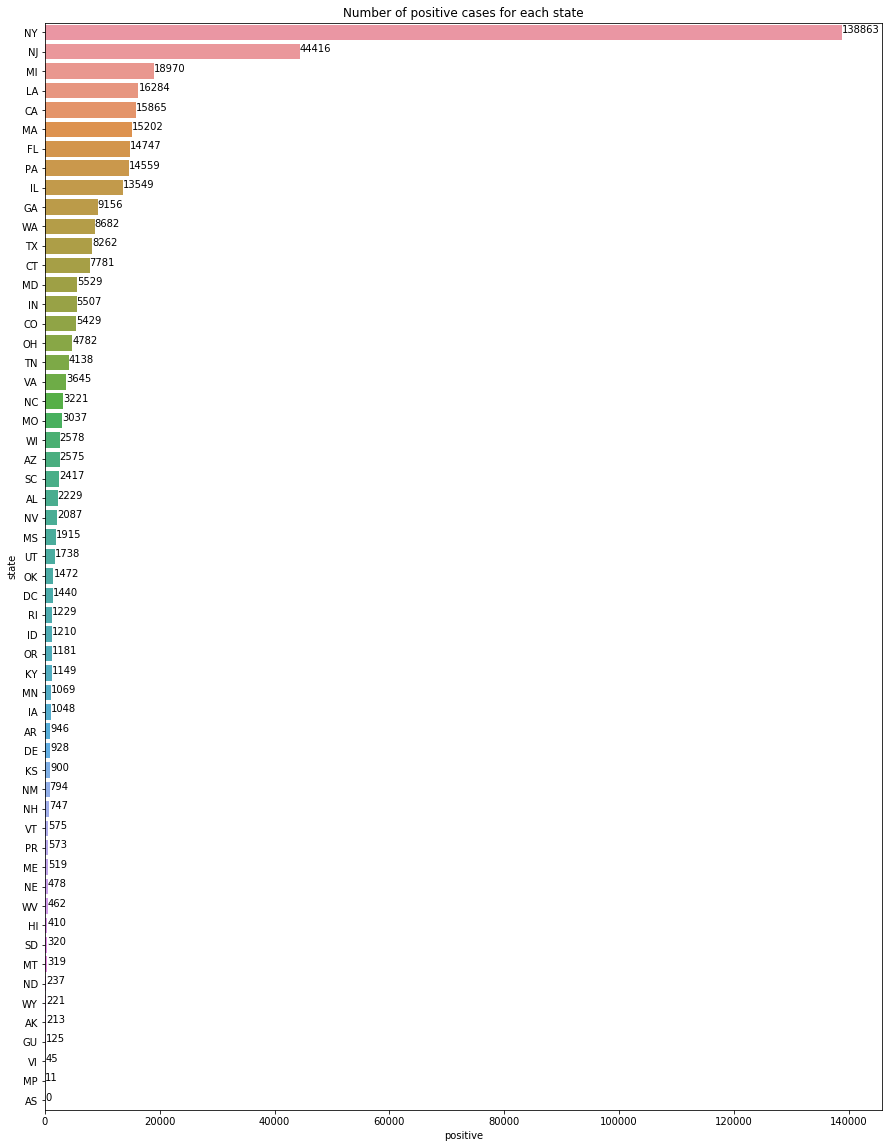

In [3]:
state_sort_by_pos = states_current.sort_values('positive', ascending = False)
plt.figure(figsize = [15, 20])
sns.barplot(x = 'positive', y = 'state', data = state_sort_by_pos)
for index, value in enumerate(state_sort_by_pos.positive):
    plt.text(value, index, str(value))
plt.title('Number of positive cases for each state');

It seems like NY dominates, it has the most cases and three times more cases than NJ. Some states like AS, MP don't have a lot of cases. It could be that NY, NYC in particular, is the financial center and is very touristy, and therefore a lot of people are gathered which increase the probability of infection. But we also suspect this could have something to do with the total number of tests performed. 

In [4]:
state_sort_by_pos = state_sort_by_pos.set_index('state')

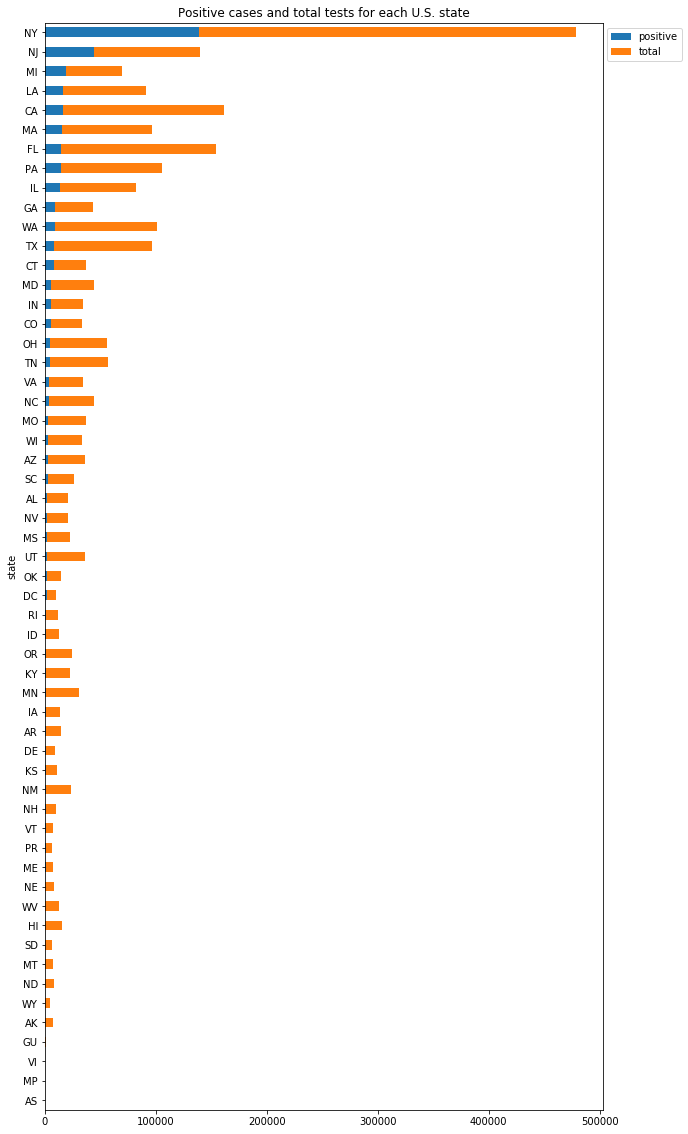

In [5]:
state_sort_by_pos.plot(kind='barh', stacked=True, figsize = [10, 20])
plt.gca().invert_yaxis()
plt.title('Positive cases and total tests for each U.S. state')
plt.legend(bbox_to_anchor=(1.15, 1));

It turns out states with more confirmed cases have performed more tests. Some states haven't performed many tests, which is worrying.

Let's check the percentages of confirmed cases:

In [15]:
state_sort_by_ratio = state_sort_by_pos.copy()
state_sort_by_ratio['percentage'] = round((state_sort_by_pos.positive/state_sort_by_pos.total) * 100, 1)
state_sort_by_ratio = state_sort_by_ratio.sort_values('percentage', ascending = False).reset_index()

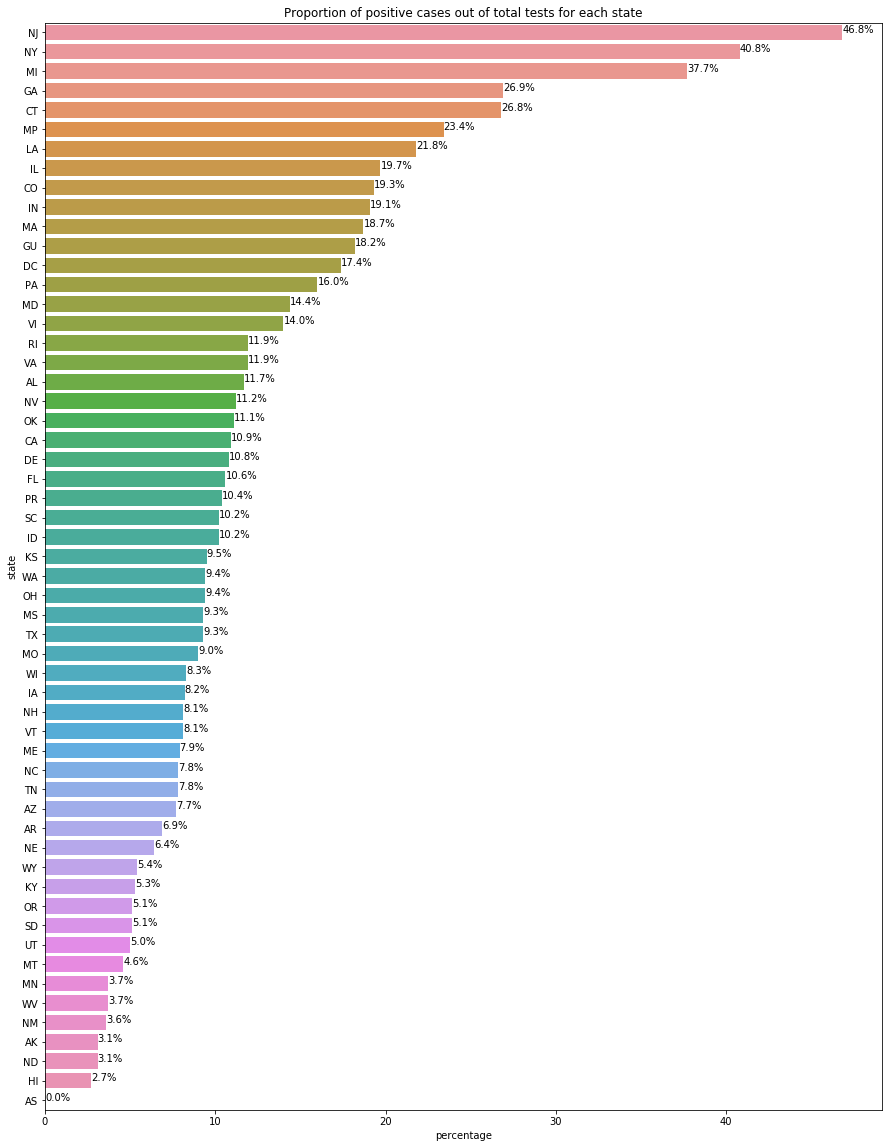

In [20]:
plt.figure(figsize = [15, 20])
sns.barplot(x = 'percentage', y = 'state', data = state_sort_by_ratio)
for index, value in enumerate(state_sort_by_ratio.percentage):
    plt.text(value, index, str(value) + '%')
plt.title('Proportion of positive cases out of total tests for each state');

NJ has less tests and less confirmed cases, but higher ratio of positive cases. 

Let's also examine the pencentages of test performed and states population. The census data we use is from 2018, which is a little out of date, but shouldn't be a big problem.

In [138]:
population = pd.read_csv('us_census_2018_population_estimates_states.csv')

In [157]:
test_ratio = population.merge(states_current, how = 'left', on = 'state')
test_ratio['percentage'] = round(test_ratio.total*100/test_ratio.population,2)
test_ratio = test_ratio.sort_values('percentage', ascending = False)

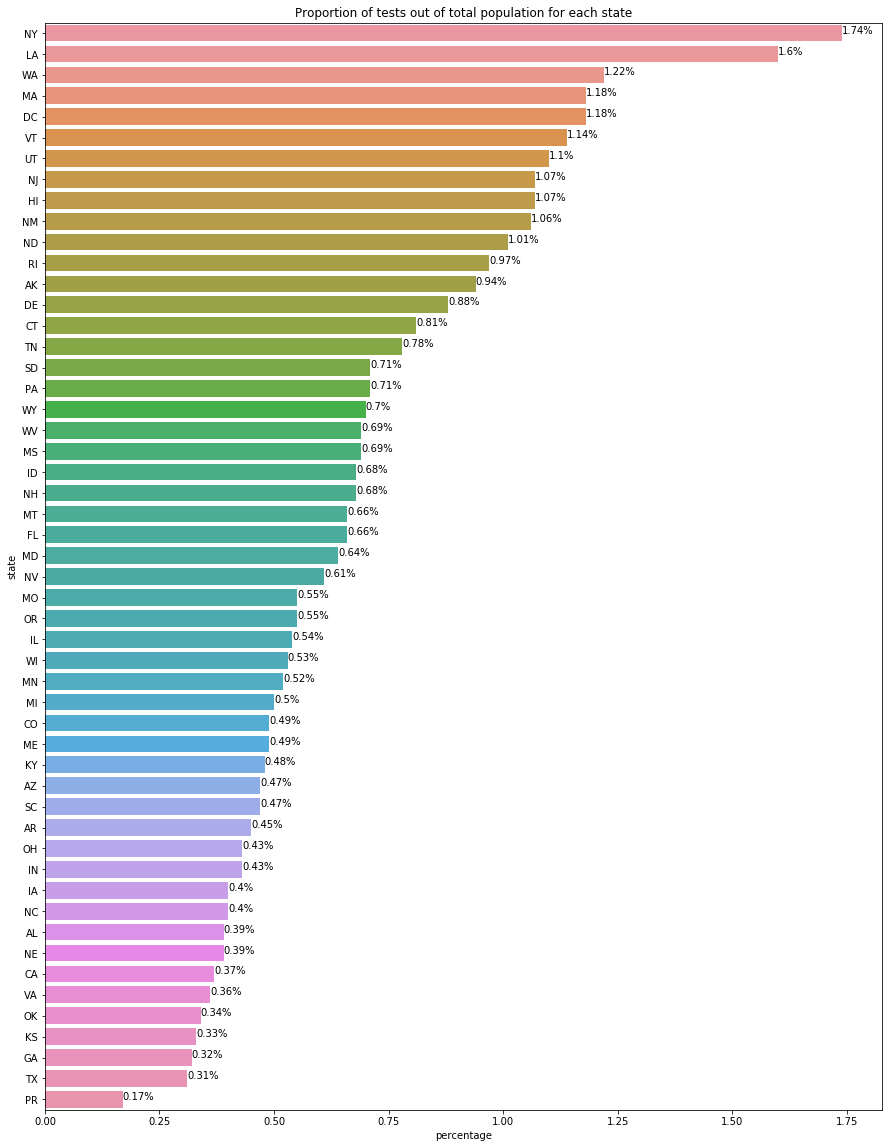

In [159]:
plt.figure(figsize = [15, 20])
sns.barplot(x = 'percentage', y = 'state', data = test_ratio)
for index, value in enumerate(test_ratio.percentage):
    plt.text(value, index, str(value) + '%')
plt.title('Proportion of tests out of total population for each state');

Seems like although NY has the most confirmed cases, it is doing a good job on testing people.

### Confirmed cases and deaths for the U.S. overtime. 

After looking at the overall picture, we'll look at the trend of confirmed cases and deaths for each state overtime. 

In [21]:
us_confirmed = pd.read_csv('time_series_covid19_confirmed_US.csv')
us_deaths = pd.read_csv('time_series_covid19_deaths_US.csv')

In [22]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,56,58,69,77,82,84,93,112,113,121
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,2,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,127,174,239,286,316,316,452,475,513,573
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,23,30,30,30,30,37,40,42,43,43


In [24]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,2,3,3,4,4,4,4,4
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3,6,8,11,12,15,18,20,21,23
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,1,1,1


In [29]:
dates = us_confirmed.columns.tolist()[11:]

First look at the trends throughout the U.S.:

In [41]:
us_confirmed_total = np.sum(us_confirmed)[dates].values
us_death_total = np.sum(us_deaths)[dates].values

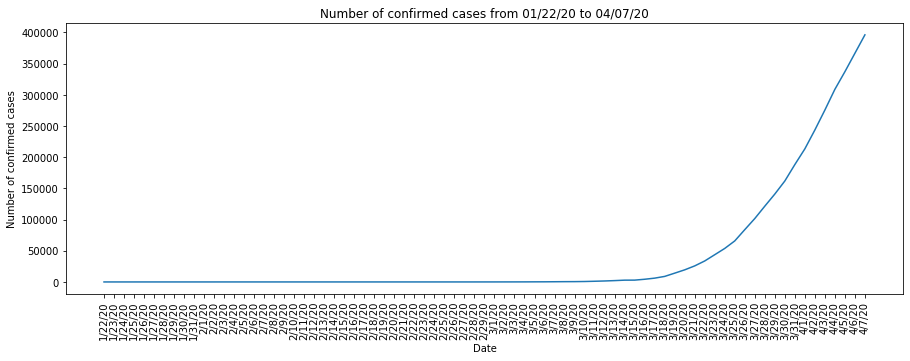

In [59]:
plt.figure(figsize = (15,5))
plt.plot(dates,us_confirmed_total)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Number of confirmed cases from 01/22/20 to 04/07/20');

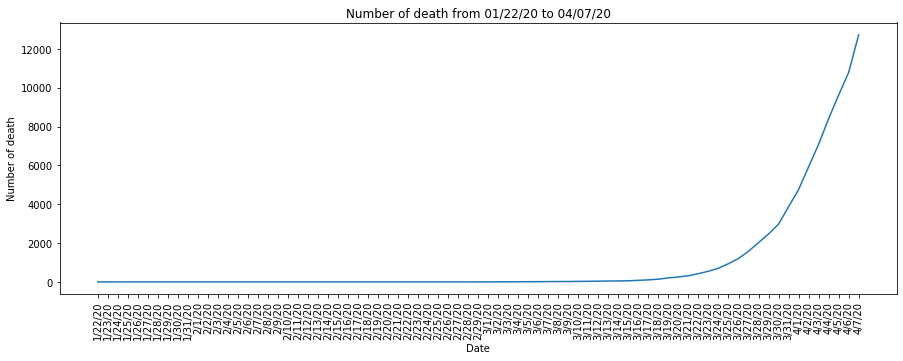

In [60]:
plt.figure(figsize = (15,5))
plt.plot(dates,us_death_total)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of death')
plt.title('Number of death from 01/22/20 to 04/07/20');

Number of confirmed cases started to increase on March 15th, number of deaths started to around the same time. 

Let's take a look at the subset after 3/15/20:

In [66]:
idx = dates.index('3/15/20')
focus_dates = dates[idx:]
focus_confirm = us_confirmed_total[idx:]
focus_death = us_death_total[idx:]

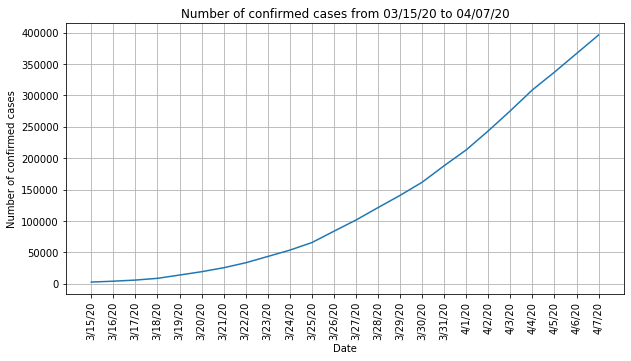

In [73]:
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(focus_dates,focus_confirm)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.title('Number of confirmed cases from 03/15/20 to 04/07/20');

Seems like the trend has become tiny bit smoother on April 4th. 

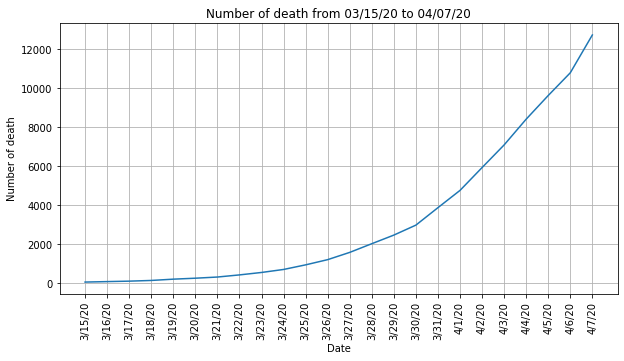

In [74]:
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(focus_dates,focus_death)
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Number of death')
plt.title('Number of death from 03/15/20 to 04/07/20');

The slope kept getting steeper since March 30th, and the steepest occur between April 6th and 7th.

Since the data from Jan. and Feb. are rather flat, for the rest of the EDA, we'll focus on data in March and April.

In [80]:
us_confirmed.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

In [85]:
idx = dates.index('3/1/20')
dates_no = dates[:idx]
dates_focus = dates[idx:]
us_confirmed_focus = us_confirmed.drop(columns = dates_no)
us_death_focus = us_deaths.drop(columns = dates_no)

### Confirmed cases and deaths for the U.S. on the state level overtime. 

In [123]:
confirmed_by_state = us_confirmed_focus.groupby('Province_State').sum()[dates_focus].reset_index()
death_by_state = us_death_focus.groupby('Province_State').sum()[dates_focus].reset_index()

In [129]:
np.arange(0,58,4)

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56])

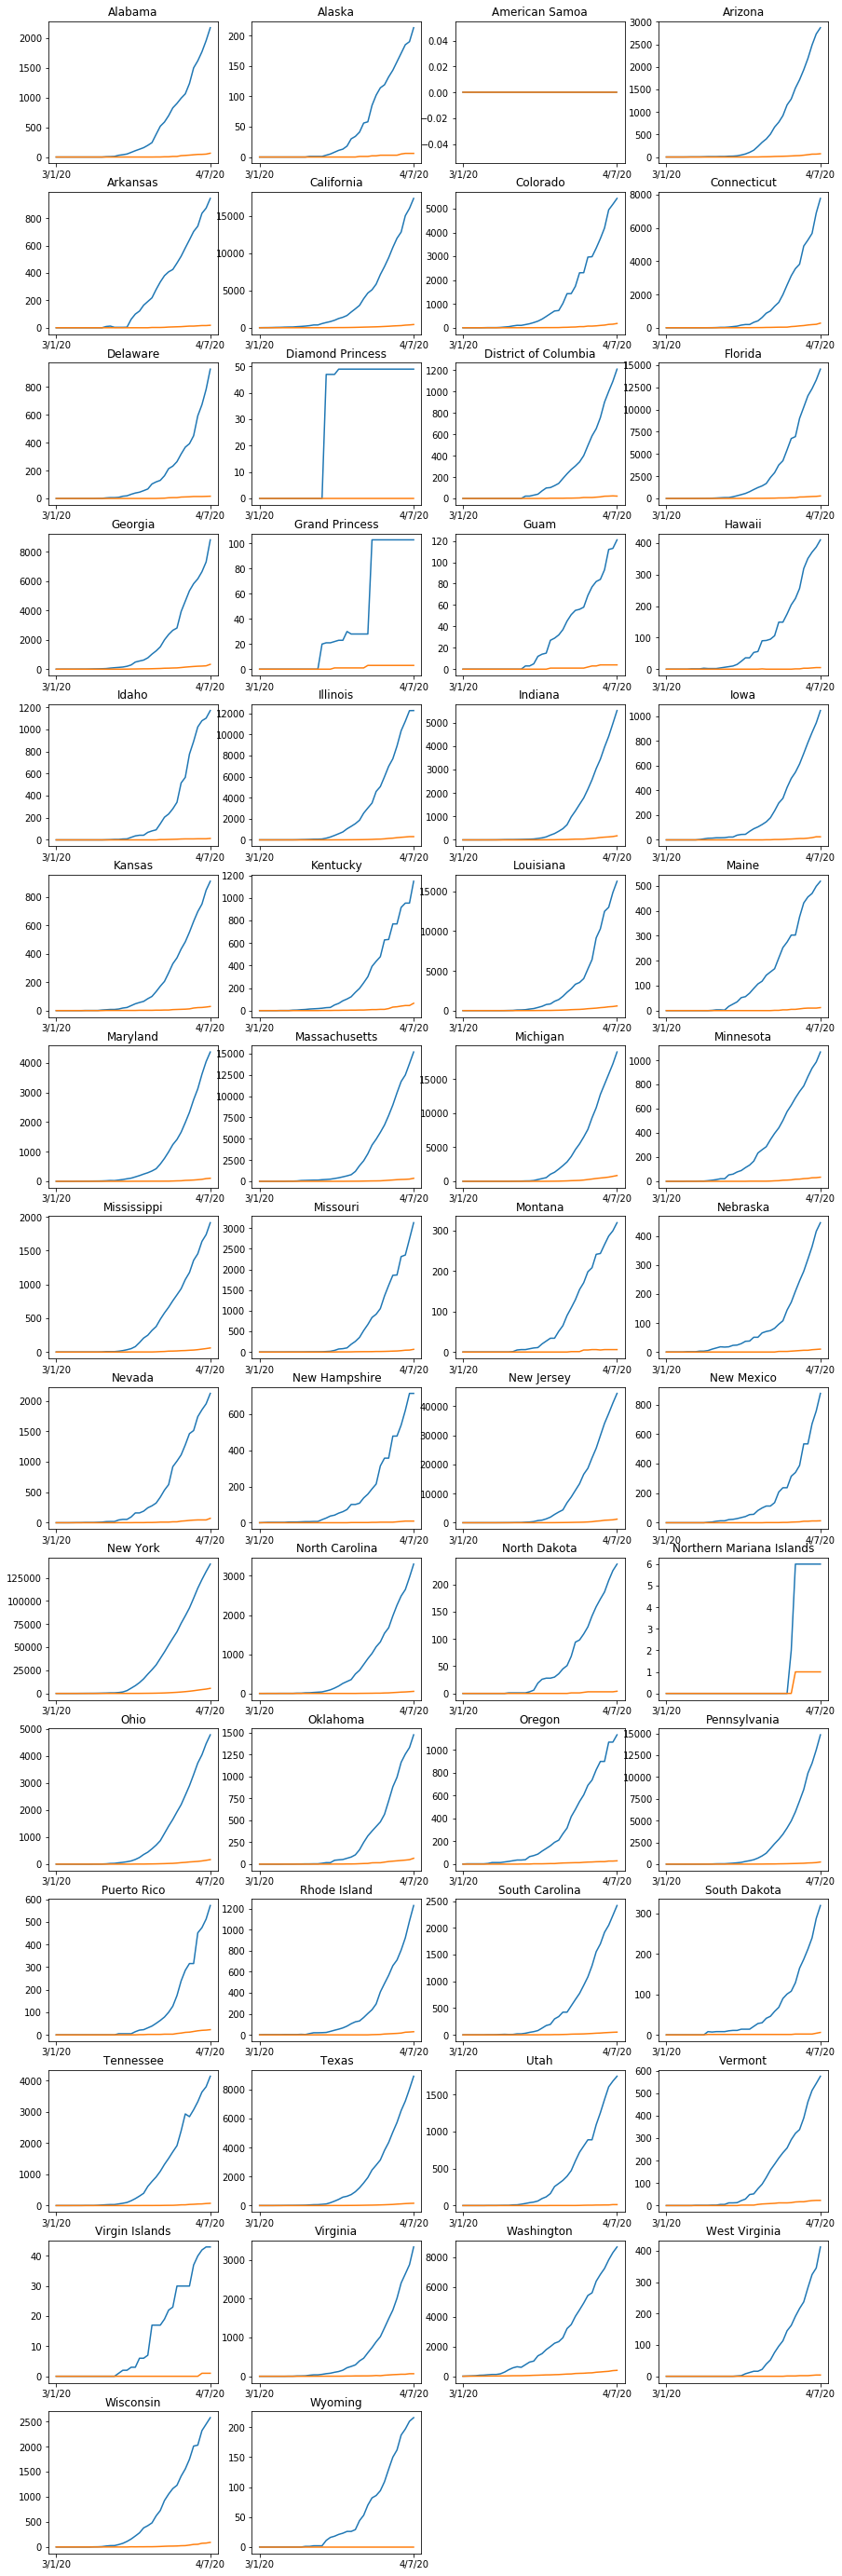

In [136]:
plt.figure(figsize = (15,50))
for i in np.arange(0,58,4):
    plt.subplot(15,4,i+1)
    plt.plot(confirmed_by_state.loc[i, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i, 'Province_State'])
    
    plt.subplot(15,4,i+2)
    plt.plot(confirmed_by_state.loc[i+1, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i+1, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i+1, 'Province_State'])
    
    if i == 56:
        break
    
    plt.subplot(15,4,i+3)
    plt.plot(confirmed_by_state.loc[i+2, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i+2, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i+2, 'Province_State'])
    
    plt.subplot(15,4,i+4)
    plt.plot(confirmed_by_state.loc[i+3, dates_focus], label = 'confirmed')
    plt.plot(death_by_state.loc[i+3, dates_focus], label = 'death')
    plt.xticks([0,len(dates_focus)-1])
    plt.title(confirmed_by_state.loc[i+3, 'Province_State'])

Despite the number difference, all 50 states follow a simialr increasing trend. 